# Boostcourse CNN Lab

## Lab 11-0 CNN Basics - Convolution

In [1]:
# 라이브러리 호출
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


image.shape (1, 3, 3, 1)


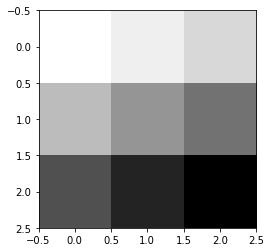

In [9]:
# Toy image
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)

print("image.shape", image.shape) # result: batch, height, width, channels
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

### Simple Convolution Layer - Padding Valid

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


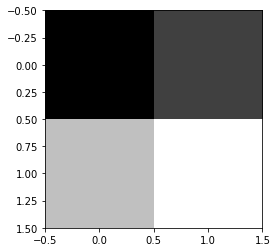

In [11]:
print("image.shape", image.shape)

# filter (weight)
weight = np.array([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print("weight.shape", weight.shape) #height, width, in_channel, out_channel

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))

plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

### Simple Convolution Layer - Padding Same

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


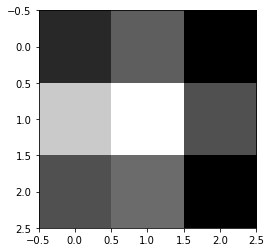

In [12]:
print("image.shape", image.shape)

# filter (weight)
weight = np.array([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]])
print("weight.shape", weight.shape) #height, width, in_channel, out_channel

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))

plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

### Simple Convolution Layer - 3 Filters

### Filter의 모양
|filter|1||filter|2||filter|3|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1|1||10|10||-1|-1|
|1|1||10|10||-1|-1|

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


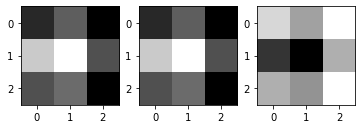

In [18]:
print("image.shape", image.shape)

# filter (weight)
weight = np.array([[[[1., 10., -1.]],[[1.,10., -1.]]],
                     [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape) #height, width, in_channel, out_channel

weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)

# 여러 필터 사용으로 추가된 코드
feature_map = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_map):
    print(feature_map.reshape(3,3))
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_map.reshape(3,3), cmap='gray')

plt.show()

## Lab 11-0 CNN Basics - Pooling

### Max Pooling - padding valid

In [19]:
# Toy image
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)

pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)

print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


### Max Pooling - padding SAME

In [21]:
# Toy image
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)

pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
# image: [[4,3,0] [2,1,0] [0,0,0]]

print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## Convolution Layer example with MNIST data

### Loading MNIST data

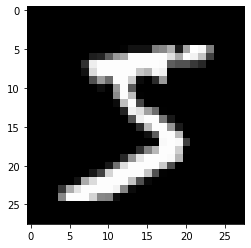

In [37]:
mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

### Convolution Layer - Output Feature Maps

(1, 14, 14, 5)


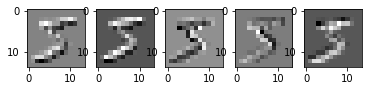

In [38]:
img = img.reshape(-1,28,28,1) # 4차원으로 변경. 첫 param은 batch
img = tf.convert_to_tensor(img) #numpy에서 tensor로 타입 변경

weight_init = keras.initializers.RandomNormal(stddev=0.01) # filter
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2), padding='SAME', kernel_initializer=weight_init)(img)
print(conv2d.shape) #14x14 image로 변환

feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1)
    plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

### Pooling Layer - Output Feature Maps

(1, 7, 7, 5)


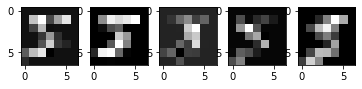

In [42]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print(pool.shape) #14x14 -> 7x7

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1)
    plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()